# Bike Sharing Assignement | Multiple Linear Regression

<span class="mark">Problem Statement:</span> 
- <b style='color:red;'>Description of the industry:</b> A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

- <b style='color:red;'>Business Problem:</b> A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

- <b style='color:red;'>What do we need to find?:</b> They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
  - Which variables are significant in predicting the demand for shared bikes.
  - How well those variables describe the bike demands

# Step 1: Importing libraries


In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 2: Reading and Understanding the Data

Read the bikesharing dataset

In [3]:
bikeds = pd.read_csv('day.csv')
bikeds.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bikeds.shape

(730, 16)

There are 16 features and 730 obervations.

In [6]:
bikeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Data Types of the data are not in correct formal. With this, even the columns like season, year, month and etc are not in binary encoding which might be a problem if we want to make the model. Even if we want to visualize the variables, we need them in object formal not in int64. There are two extra columns "isntant" and 'dteday' which is not serving any purpose.Dteday already has it's information extracted and thus we would not need that columns. There are no missing values in the data

# Step 3: Cleaning Data

* instant is just a row instance identifier.
* dteday is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we will not consider day to day trend in demand for bikes.
* casual and registered variables are also describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.
* Replace season binary numbers into meaningful categories.
    * season
    * yr
    * mnth
    * holiday
    * weekday
    * workingday
    * weathersit

### 3.1 Drop columns that are not useful for analysis¶

In [7]:
bikeds0 = bikeds.drop(bikeds[['instant','dteday','casual','registered']],axis=1)
bikeds0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 3.2 Replace binary numbers with meaningful categories.
    * season
    * yr
    * mnth
    * holiday
    * weekday
    * workingday
    * weathersit

In [8]:
bikeds0['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'},inplace=True)
bikeds0['yr'].replace({0:2018,1:2019},inplace=True)
bikeds0['mnth'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'},inplace=True)
bikeds0['holiday'].replace({0:'No_Holiday',1:"Holiday"},inplace=True)
bikeds0['weekday'].replace({0:'Mon',1:'Tue',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'},inplace=True)
bikeds0['workingday'].replace({0:'WorkingDay',1:'NonWorkingDay'},inplace=True)
bikeds0['weathersit'].replace({1:'Clear',2:'Cloudy',3:'Light Rain',4:'Heavy Rain'},inplace=True)

In [9]:
bikeds0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No_Holiday,Tue,NonWorkingDay,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No_Holiday,Wed,NonWorkingDay,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No_Holiday,Thurs,NonWorkingDay,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No_Holiday,Fri,NonWorkingDay,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No_Holiday,Sat,NonWorkingDay,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bikeds0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 68.6+ KB


There are 730 instances in the dataset, which means it is fairly small. 
All predictors are numericals except dteday. It is type of Object. 

### 3.2 Check Missing values

In [11]:
bikeds0.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

There are no missing values in the data set.

# 4. EDA

    * Check all the categorical variables against our target variable 'cnt' by groupby
    * Boxplot of all the categorical variabales against our target variable 'cnt'
    * Scatter Plot of all the numerical variable against our target variable 'cnt'
    * Co-relations of all the variables against each other

### 4.1 Analysis of Categorical variables

In [12]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [13]:
bikeds0.groupby('yr')['cnt'].aggregate(["sum","mean","median",p75])

,sum,mean,median,p75
yr,,,,
2018,1243103,3405.761644,3740,4586
2019,2047742,5610.252055,5936,7013


In 2018 , there are 12,43,103 bikes had shared and in 2019 is 20,47,742 bikes had shared. There is increase of 8,04,639. Approximately 64% increase in bike sharing from 2018 to 2019.

In [14]:
bikeds0.groupby('season')['cnt'].aggregate(["sum","mean","median",p75])

,sum,mean,median,p75
season,,,,
fall,1061129,5644.303191,5353.5,6929.25
spring,469514,2608.411111,2222.5,3463.75
summer,918589,4992.331522,4941.5,6377.00
winter,841613,4728.162921,4634.5,5624.50


In fall season, the bike sharing is more compare to all other seasons and next season is summer, winter and spring. So we can think of adding more bikes in Fall season as the people are using more bike sharing in Fall season. And Next season we can look for Summer and winter to add more bikes. 

In [15]:
bikeds0.groupby('weathersit')['cnt'].aggregate('sum')

weathersit
Clear         2257952
Cloudy         995024
Light Rain      37869
Name: cnt, dtype: int64

Bike sharing is more on when the whether condition is ClearNext highest sharing is on Cloudy and Light Rain.

In [16]:
bikeds0.groupby('workingday')['cnt'].aggregate(["sum","mean","median",p75])

,sum,mean,median,p75
workingday,,,,
NonWorkingDay,2253988,4472.198413,4544.5,5897.5
WorkingDay,1036857,4587.862832,4572.0,6043.0


Bike sharing is more on NonWorkind Day than the WorkingDay. This is interesting and need to some statistical analysis for finding the more insights. 

In [17]:
bikeds0.groupby('weekday')['cnt'].aggregate('sum')

weekday
Fri      487923
Mon      485235
Sat      478132
Sun      481176
Thurs    462276
Tue      447281
Wed      448822
Name: cnt, dtype: int64

As per the above data, bikesharing is equally same acorss all the days in a week, starting 0 as (Sunday). There is slightly increase on 4th day of of the week, i.e,Thurday. 

### 4.2 Plotting Boxplot for all categorical variables

    * season
    * yr
    * mnth
    * holiday
    * weekday
    * workingday
    * weathersit

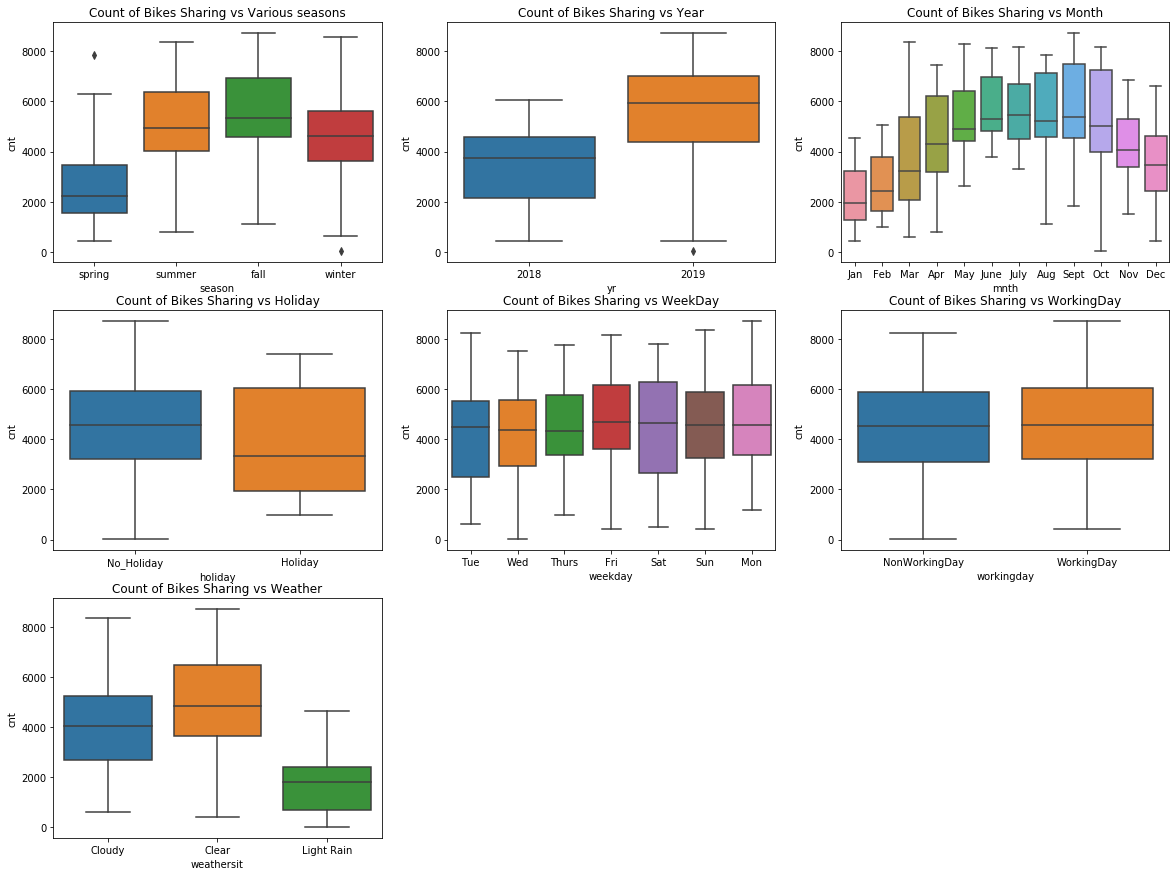

In [18]:
# Plotting box plot for categorical variables against 'cnt'

plt.figure(figsize =(20,15)) # Controlling the figure size

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikeds0).set_title('Count of Bikes Sharing vs Various seasons')

plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikeds0).set_title("Count of Bikes Sharing vs Year")

plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikeds0).set_title("Count of Bikes Sharing vs Month")

plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikeds0).set_title("Count of Bikes Sharing vs Holiday")

plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikeds0).set_title("Count of Bikes Sharing vs WeekDay")

plt.subplot(3,3,6)
sns.boxplot(x='workingday',y='cnt',data=bikeds0).set_title("Count of Bikes Sharing vs WorkingDay")

plt.subplot(3,3,7)
sns.boxplot(x='weathersit',y='cnt',data=bikeds0).set_title("Count of Bikes Sharing vs Weather")

plt.show()

### Inferece:
1. Season: 3:fall has highest demand for rental bikes
2. Demand of bike sharing is increased from 2018 to 2019. This pattern can be extepted for for future yrs. has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.
8. Also there are no outliers

### 4.3 Plotting scatter plot for all Numerical variables

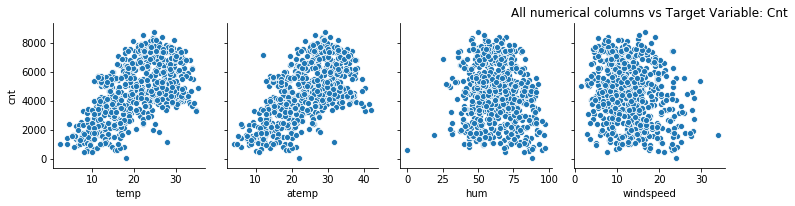

In [19]:
# Plotting scatter plot for numerical variables against our target variable 'cnt'
sns.pairplot(bikeds0,x_vars=["temp", "atemp", "hum",'windspeed'], y_vars=['cnt'])
plt.title("All numerical columns vs Target Variable: Cnt")
plt.show()

### Inferece:
1. Temp and atemp are having positive relation with traget variable cnt. 
2. Seems to hum and windspeed are having negative relation with target varialbe 'cnt'.

### 4.3.1 Visualizing relation between continuos independent variables with dependent variables
1. temp Vs Cnt
2. hum Vs Cnt
3. windspeed Vs Cnt

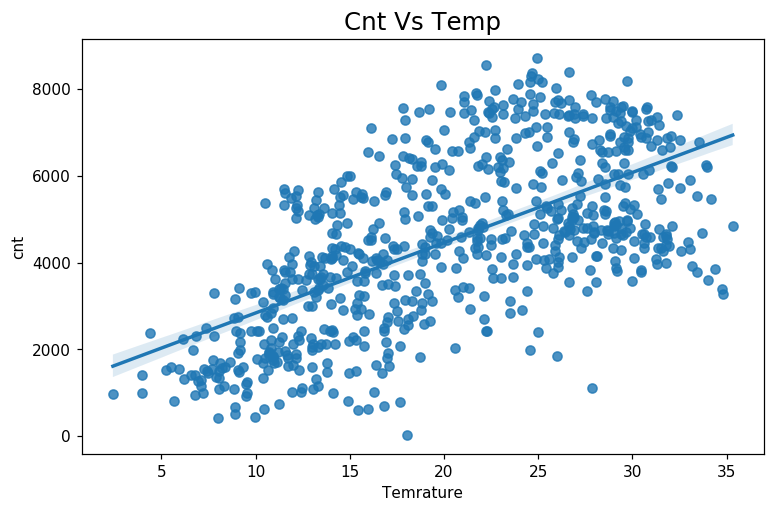

In [20]:
plt.figure(figsize=(8,5),dpi=110)
plt.title("Cnt Vs Temp", fontsize=16)
sns.regplot(data=bikeds0,x='temp',y='cnt')
plt.xlabel("Temrature")
plt.show()

1. Demands for bikes are positively correlated with temp.
2. There is a liner ration between cnt and temp.

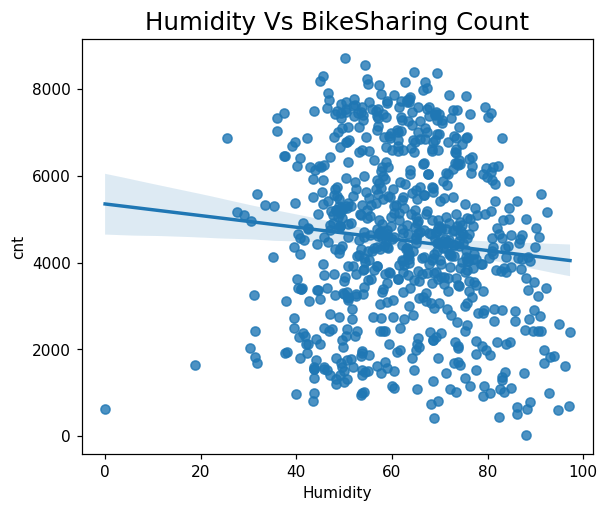

In [21]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Humidity Vs BikeSharing Count",fontsize=16)
sns.regplot(data=bikeds0,x='hum',y='cnt')
plt.xlabel("Humidity")
plt.show()

### Inference
1. Humid data points are scattered across.
2. There is negative linear relationship between Humidity and Cnt. As humidity increases, bikesharing is descreasing.

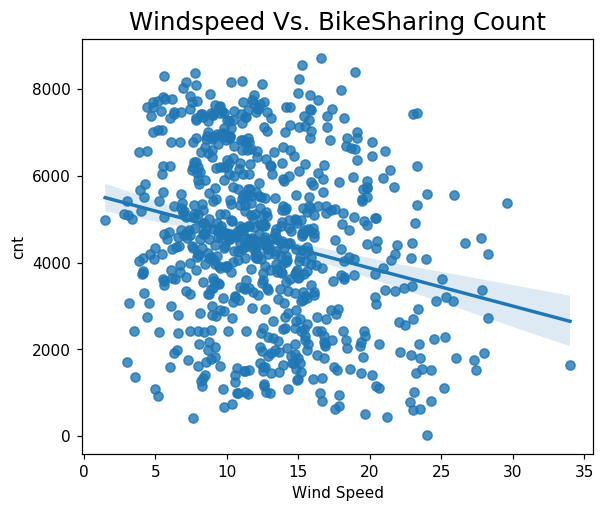

In [22]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Windspeed Vs. BikeSharing Count",fontsize=16)
sns.regplot(data=bikeds0,x='windspeed',y='cnt')
plt.xlabel('Wind Speed')
plt.show()

### Inference:
1. Windspeed is values are more scattered around.
2. Although we can see cnt decreasing with increase in windspeed.

### 4.4 Checking outliers by Plotting box plot for all Numerical variable

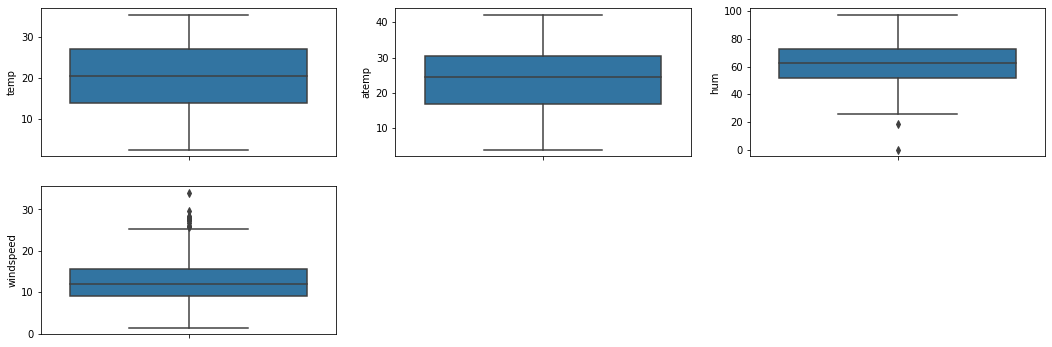

In [23]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,6))
i = 1
for col in cols:
    plt.subplot(2,3,i)
    sns.boxplot(y=col, data=bikeds0)
    i+=1

From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

### 4.5 HeatMap - Co-relations of all the variables against each other

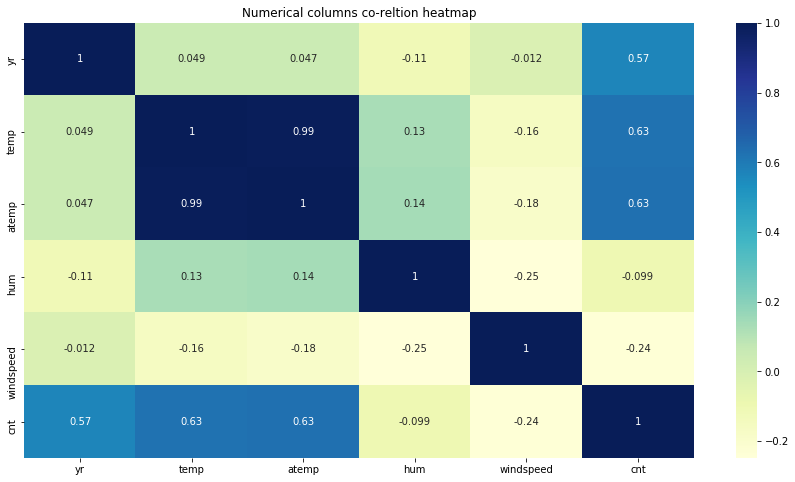

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(bikeds0.corr(), cmap='YlGnBu', annot = True)
plt.title("Numerical columns co-reltion heatmap")
plt.show()

1. temp and ateamp is having postive correlation with traget variable cnt.
2. Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only.
3. hum and windspeed is having negitive correlation with target variable cnt.

# 5. Data Preparation for Model Building

1. Create dummy variables for all the categorical variables like 0 and 1
    * Need to convert them into dummy variables, because machines does not understand their indivisual meanings.
2. Splitting into test and trainning set
    * Split the whole dataset into 70:30 trainning and testing set.
3. Re-scaling the variables
    * Need to scale the numerical columns also because they range from 12 to 1349 which would increase our processing time and 
      also not give us clear co-efficients which can be easily calculated or infered. This means that one co-efficient can be a 
      huge number giving us an impression that is very important which might not be the case.

### 5.1 Create dummy variables for all categorical variables

In [25]:
bikeds0.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,No_Holiday,Tue,NonWorkingDay,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,No_Holiday,Wed,NonWorkingDay,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,No_Holiday,Thurs,NonWorkingDay,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,No_Holiday,Fri,NonWorkingDay,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,No_Holiday,Sat,NonWorkingDay,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [26]:
bikeds0['yr'] = bikeds0['yr'].astype(str)

In [27]:
bikeds0.dtypes

season         object
yr             object
mnth           object
holiday        object
weekday        object
workingday     object
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [28]:
status = pd.get_dummies(bikeds0[['season','yr','mnth','holiday','weekday','workingday','weathersit']],drop_first=True)
status.head()

,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,...,holiday_No_Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Cloudy,weathersit_Light Rain
0,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


* Dropping the first columns as (p-1) dummies can explain p categories.

In [29]:
bikeds1 = pd.concat([bikeds0,status],axis=1)
bikeds1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,holiday_No_Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Cloudy,weathersit_Light Rain
0,spring,2018,Jan,No_Holiday,Tue,NonWorkingDay,Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,1,0,0,1,0
1,spring,2018,Jan,No_Holiday,Wed,NonWorkingDay,Cloudy,14.902598,17.68695,69.6087,...,1,0,0,0,0,0,1,0,1,0
2,spring,2018,Jan,No_Holiday,Thurs,NonWorkingDay,Clear,8.050924,9.47025,43.7273,...,1,0,0,0,1,0,0,0,0,0
3,spring,2018,Jan,No_Holiday,Fri,NonWorkingDay,Clear,8.200000,10.60610,59.0435,...,1,0,0,0,0,0,0,0,0,0
4,spring,2018,Jan,No_Holiday,Sat,NonWorkingDay,Clear,9.305237,11.46350,43.6957,...,1,0,1,0,0,0,0,0,0,0


In [30]:
# Dropping Feature - season, yr, mnth,holiday,weekday,workingday,weatersit as we converted into dummy variables
bikeds1 = bikeds1.drop(['season','yr','mnth','holiday','weekday','workingday','weathersit'],axis=1)
bikeds1.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_No_Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Cloudy,weathersit_Light Rain
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [31]:
#Print columns after creating dummies
bikeds1.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'holiday_No_Holiday',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tue', 'weekday_Wed', 'workingday_WorkingDay',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [32]:
bikeds1.shape

(730, 30)

### 5.2 Splitting the Data into Training and Testing Sets

In [33]:
df_train,df_test = train_test_split(bikeds1,train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
# Checking train and test shape
print(df_train.shape,df_test.shape)

(510, 30) (219, 30)


### 5.3 Rescaling the Features
We will use MinMax scaling

In [35]:
scaler = MinMaxScaler()

In [36]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_No_Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Cloudy,weathersit_Light Rain
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,...,1,1,0,0,0,0,0,1,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,...,1,1,0,0,0,0,0,1,1,0


In [37]:
#Inspect stats fro Training set after scaling
df_train.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,yr_2019,mnth_Aug,...,holiday_No_Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,workingday_WorkingDay,weathersit_Cloudy,weathersit_Light Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.507843,0.096078,...,0.974510,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.288235,0.343137,0.029412
std,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.500429,0.294988,...,0.157763,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.453386,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


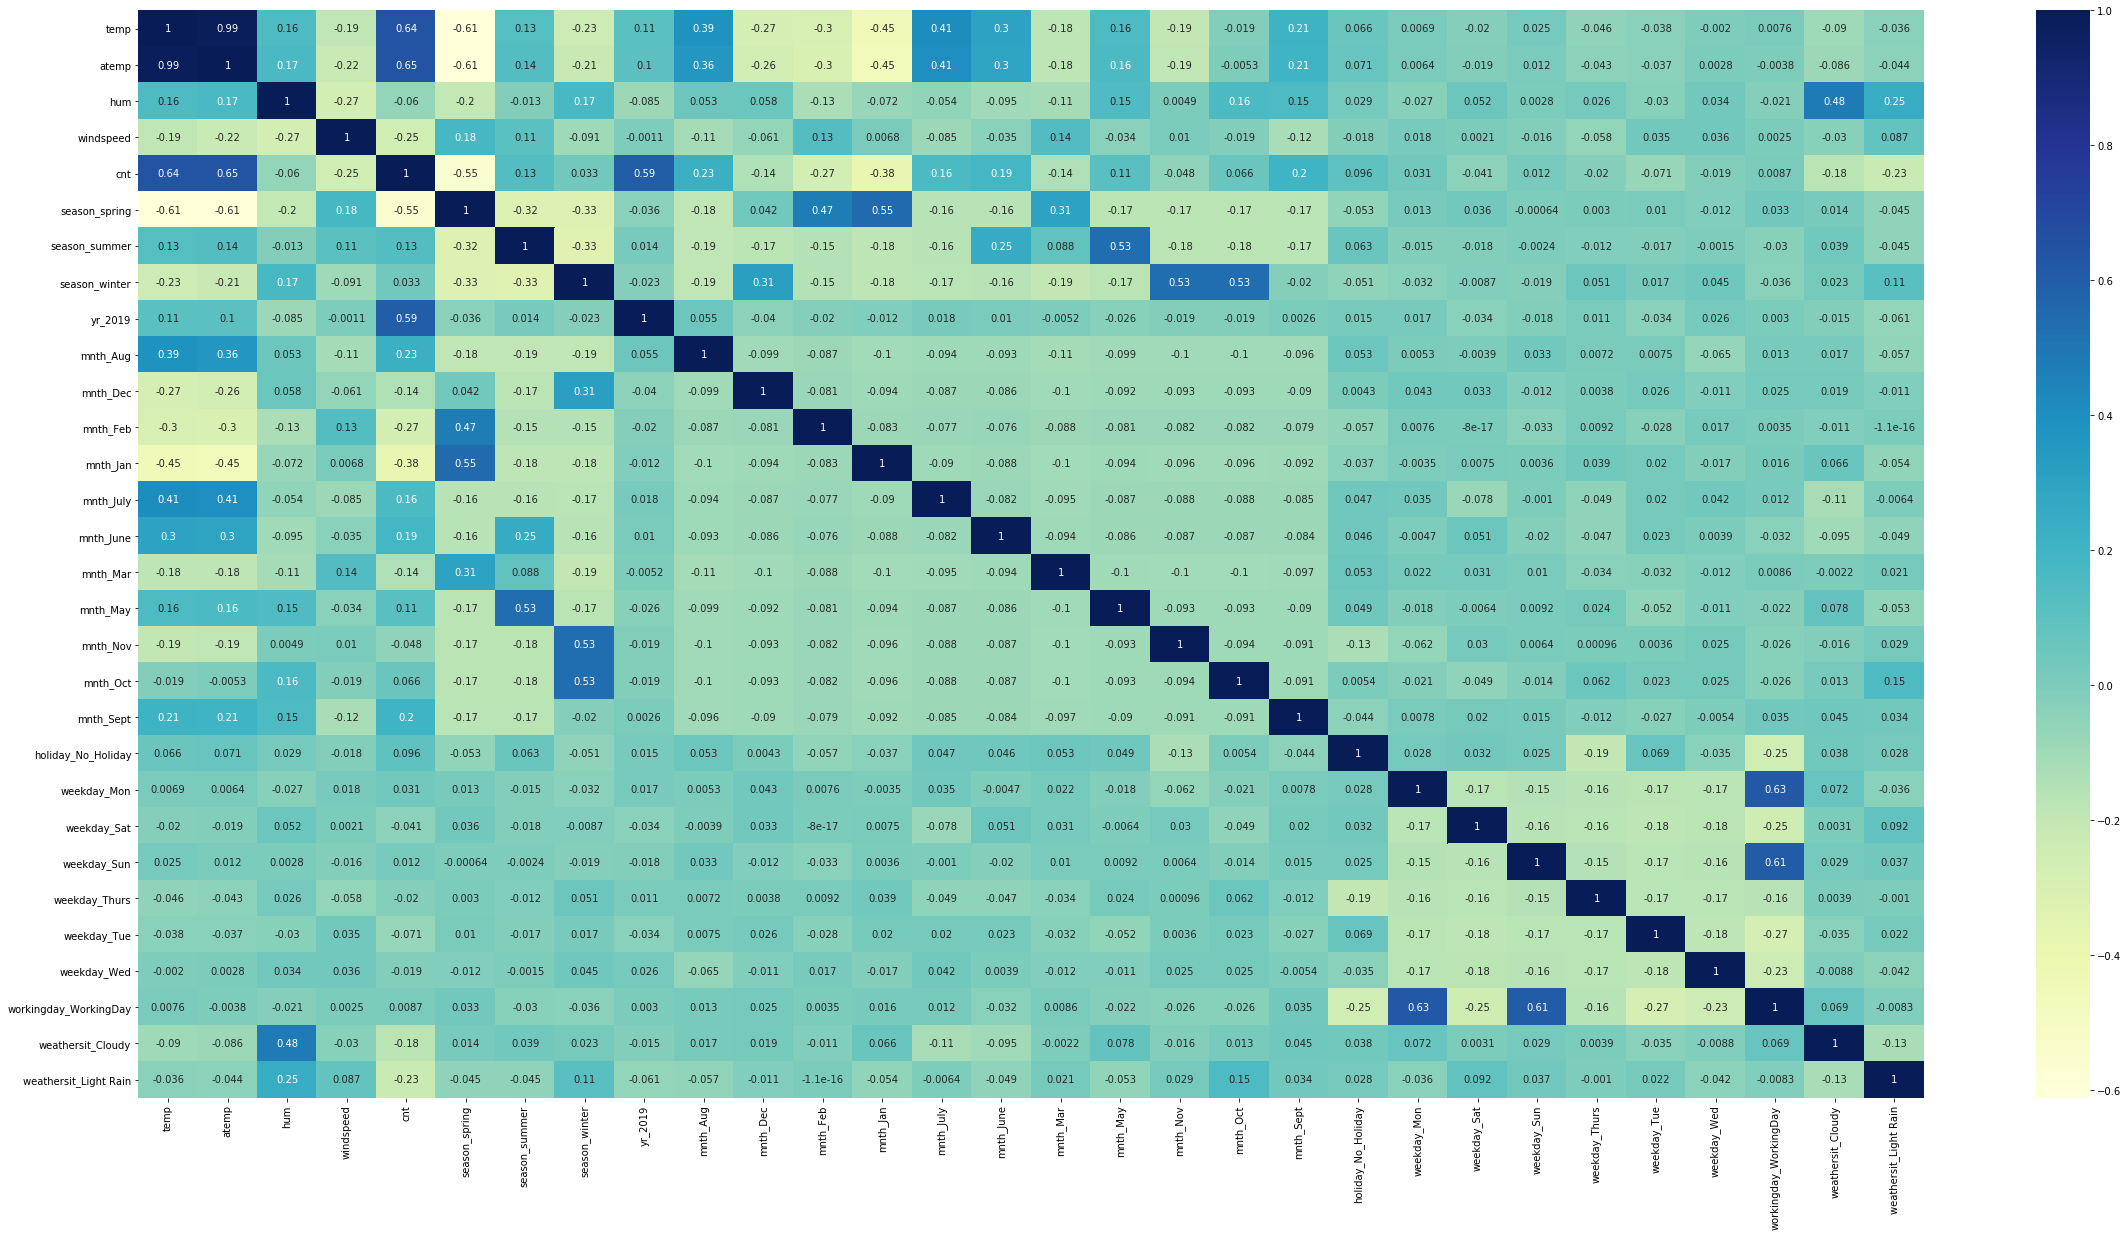

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (40, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### 5.4 Dividing into X and Y sets for the model building

In [39]:
y_train = df_train.pop('cnt')
X_train = df_train

In [40]:
# Printing shape of X_train and y_train
print(X_train.shape,y_train.shape)

(510, 29) (510,)


# Step 6: Building a linear model by using Stats Model

### Model1 - Backward Selection: We would use all variables to make our first model and then using our business accumen we would drop feature by feature.

<b style='color:red;'>Backward Selection:</b>We would use all our variables and drop them one by one to prevent high VIF or reduce it in important business variables.. I personally prefer this way, because I feel i don't lose on any important variable.

In [41]:
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.params)
print(lr_1.summary())

const                    0.202482
temp                     0.400268
atemp                    0.046419
hum                     -0.157757
windspeed               -0.181137
season_spring           -0.044097
season_summer            0.041756
season_winter            0.110482
yr_2019                  0.230933
mnth_Aug                 0.023034
mnth_Dec                -0.045685
mnth_Feb                -0.037177
mnth_Jan                -0.063451
mnth_July               -0.033912
mnth_June                0.002144
mnth_Mar                 0.000805
mnth_May                 0.024765
mnth_Nov                -0.041530
mnth_Oct                 0.005922
mnth_Sept                0.086720
holiday_No_Holiday       0.135245
weekday_Mon             -0.054148
weekday_Sat             -0.003841
weekday_Sun             -0.060150
weekday_Thurs           -0.015088
weekday_Tue             -0.028509
weekday_Wed             -0.030182
workingday_WorkingDay    0.060878
weathersit_Cloudy       -0.059311
weathersit_Lig

1. R-Square is good which is 85 percent and Adjusted R-Square is also very clsoe to R-Square
2. From the summary the below features are having high P-Values greater than 5 percent, few examples are :
  * atemp
  * days_old
  * mnth_dec. mnth_jul, mnth_jun,mnth_mar. mnth_nov,mnth_Oct
  * Weekday_thur
3. Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,443.82
1,atemp,382.53
19,holiday_No_Holiday,86.07
2,hum,41.78
26,workingday_WorkingDay,41.70
20,weekday_Mon,22.85
22,weekday_Sun,21.48
4,season_spring,13.56
6,season_winter,12.39
5,season_summer,9.68


<b style='color:red;'>Infrence:</b> We see co-efficinets with e^x and p-value have pretty high values too. That means we are using variables that are too much co-related and some are redundant also in presence of other variables, thus we have to delete them.
____
<b style='color:red;'>Reasoning:</b> I checked the co-relation of atemp and temp which is 0.99 which can mean that both of the variables have some what same values. Thus, I think temp is an important variable and so we can start by dropping atemp.

### Model2 - Removing atemp features as it is having high P-Value and VIF is above 5

In [43]:
# Droping Dropping highly correlated variables and insignificant variables - atemp
X = X_train.drop('atemp',1)

In [44]:
# Building Model 2
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train,X_train_lm).fit()

print(lr_2.params)
print(lr_2.summary())

const                    0.202458
temp                     0.445458
hum                     -0.157315
windspeed               -0.183046
season_spring           -0.043705
season_summer            0.042243
season_winter            0.110897
yr_2019                  0.230857
mnth_Aug                 0.021507
mnth_Dec                -0.045669
mnth_Feb                -0.037279
mnth_Jan                -0.063612
mnth_July               -0.034910
mnth_June                0.000975
mnth_Mar                 0.000608
mnth_May                 0.024064
mnth_Nov                -0.041555
mnth_Oct                 0.005790
mnth_Sept                0.086055
holiday_No_Holiday       0.135424
weekday_Mon             -0.053825
weekday_Sat             -0.003863
weekday_Sun             -0.060182
weekday_Thurs           -0.015104
weekday_Tue             -0.028496
weekday_Wed             -0.030162
workingday_WorkingDay    0.060524
weathersit_Cloudy       -0.059355
weathersit_Light Rain   -0.251511
dtype: float64

Inference :
1. No change in R-Square and Adjusted R-Square after removing the atemp feature
2. There are many features which is having P-Value greater than 5 percent
3. Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

In [45]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
18,holiday_No_Holiday,86.05
0,temp,44.43
1,hum,41.73
25,workingday_WorkingDay,41.68
19,weekday_Mon,22.84
21,weekday_Sun,21.48
3,season_spring,13.54
5,season_winter,12.37
4,season_summer,9.65
16,mnth_Oct,6.95


<b style='color:red;'>Infrence:</b> The VIF and p-values have dropped alot. We can now move onto next variable. 
____
<b style='color:red;'>Removing Condition - Order of Sequence:</b> 
    1. High P-Value and High VIF 
    2. High P-Value and Low VIF
    3. Low P-Value and High VIF
    4. Low P-Value and Low VIF. 
    
<b style='color:red;'>Reasoning: </b>holiday_No_Holiday is having high VIF. As this variable is being captured by weekends, weekdays and other variables and it is not useful for our model. Thus we can delete this sub-category.Hence Removing this field .

### Model 3 - Removing holiday_No_Holiday features as it is having high VIF

In [46]:
# Droping Days_old feature as it is having high p-value and insignificant variable - holiday_No_Holiday
X  = X.drop('holiday_No_Holiday',1)

In [47]:
# Build a mode

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train,X_train_lm).fit()

print(lr_3.params)
print(lr_3.summary())

const                    0.336553
temp                     0.446288
hum                     -0.155066
windspeed               -0.184744
season_spring           -0.043386
season_summer            0.042194
season_winter            0.110629
yr_2019                  0.231937
mnth_Aug                 0.020868
mnth_Dec                -0.045681
mnth_Feb                -0.037405
mnth_Jan                -0.063898
mnth_July               -0.035291
mnth_June                0.000651
mnth_Mar                 0.000555
mnth_May                 0.023530
mnth_Nov                -0.047734
mnth_Oct                 0.005440
mnth_Sept                0.085372
weekday_Mon              0.078688
weekday_Sat             -0.003835
weekday_Sun              0.072521
weekday_Thurs           -0.015237
weekday_Tue             -0.028402
weekday_Wed             -0.030134
workingday_WorkingDay   -0.074269
weathersit_Cloudy       -0.058663
weathersit_Light Rain   -0.250447
dtype: float64
                            OLS R

Inference :

1. No change in R-Square and Adjusted R-Square after removing the atemp feature

In [48]:
# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
1,hum,37.98
0,temp,36.99
24,workingday_WorkingDay,15.00
3,season_spring,11.93
5,season_winter,11.80
18,weekday_Mon,9.06
20,weekday_Sun,8.58
4,season_summer,6.88
16,mnth_Oct,6.41
15,mnth_Nov,6.04


<b style='color:red;'>Infrence:</b> The VIF and p-values are slightly reduced. We can now move onto next variable. 
____
<b style='color:red;'>Removing Condition - Order of Sequence:</b> 
    1. High P-Value and High VIF 
    2. High P-Value and Low VIF
    3. Low P-Value and High VIF
    4. Low P-Value and Low VIF. 
    
<b style='color:red;'>Reasoning: </b>workingday_WorkingDay has a high VIF of 15 and it's p-value of 0.010 and I think it is redundant because same information is being captured by Weekdays working day. This variable is not important for our model. Thus, they are pretty co-related.

# Model 4 - Removing workingday_WorkingDay features as it is having high VIF

In [49]:
# Droping Days_old feature as it is having high p-value and insignificant variable - workingday_WorkingDay
X = X.drop('workingday_WorkingDay',1)

In [50]:
# Build a Model 4
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train,X_train_lm).fit()

print(lr_4.params)
print(lr_4.summary())

const                    0.341818
temp                     0.436924
hum                     -0.154828
windspeed               -0.184648
season_spring           -0.044791
season_summer            0.040927
season_winter            0.115557
yr_2019                  0.231909
mnth_Aug                 0.024261
mnth_Dec                -0.051305
mnth_Feb                -0.041554
mnth_Jan                -0.067562
mnth_July               -0.031504
mnth_June                0.004503
mnth_Mar                 0.001454
mnth_May                 0.026983
mnth_Nov                -0.056299
mnth_Oct                 0.000045
mnth_Sept                0.082943
weekday_Mon              0.004243
weekday_Sat             -0.004732
weekday_Sun             -0.001778
weekday_Thurs           -0.022793
weekday_Tue             -0.028561
weekday_Wed             -0.032999
weathersit_Cloudy       -0.058085
weathersit_Light Rain   -0.248534
dtype: float64
                            OLS Regression Results                 

1. There is no change in R-Square and Adjsted R-Square. Will check VIF

In [51]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
1,hum,37.97
0,temp,36.84
3,season_spring,11.93
5,season_winter,11.72
4,season_summer,6.87
16,mnth_Oct,6.40
15,mnth_Nov,6.01
7,mnth_Aug,5.91
11,mnth_July,5.30
10,mnth_Jan,5.19


<b style='color:red;'>Infrence:</b> The VIF and p-values are slightly reduced. We can now move onto next variable. 
____
<b style='color:red;'>Removing Condition - Order of Sequence:</b> 
    1. High P-Value and High VIF 
    2. High P-Value and Low VIF
    3. Low P-Value and High VIF
    4. Low P-Value and Low VIF. 
    
<b style='color:red;'>Reasoning: </b>Humidity and temprature are inversely co-related in terms of scientific formulas, thus pretty high-corelation. What data humidity is capturing is being captured by temprature too. This variable has ~0.000 which is low but a very high VIF. .

# Model 5 - Removing hum features as it is having high VIF

In [52]:
# Droping hum feature
X = X.drop('hum',1)
X.columns

Index(['temp', 'windspeed', 'season_spring', 'season_summer', 'season_winter',
       'yr_2019', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [53]:
# Building Model 5
X_train_lm = sm.add_constant(X) # Adding constnat

lr_5 = sm.OLS(y_train,X_train_lm).fit()

print(lr_5.params)
print(lr_5.summary())

const                    0.281309
temp                     0.386418
windspeed               -0.156376
season_spring           -0.049230
season_summer            0.031684
season_winter            0.111601
yr_2019                  0.235681
mnth_Aug                 0.020855
mnth_Dec                -0.073682
mnth_Feb                -0.055009
mnth_Jan                -0.086698
mnth_July               -0.027959
mnth_June                0.012087
mnth_Mar                -0.006395
mnth_May                 0.019942
mnth_Nov                -0.073199
mnth_Oct                -0.017554
mnth_Sept                0.070983
weekday_Mon              0.005672
weekday_Sat             -0.006722
weekday_Sun             -0.000545
weekday_Thurs           -0.024083
weekday_Tue             -0.029825
weekday_Wed             -0.037229
weathersit_Cloudy       -0.082133
weathersit_Light Rain   -0.290555
dtype: float64
                            OLS Regression Results                            
Dep. Variable:        

1. No Change in R_Square and Adjusted R-Square

In [54]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,26.83
4,season_winter,11.50
2,season_spring,11.44
15,mnth_Oct,5.95
3,season_summer,5.79
6,mnth_Aug,5.70
14,mnth_Nov,5.44
10,mnth_July,5.22
1,windspeed,4.95
9,mnth_Jan,4.56


<b style='color:red;'>Infrence:</b> The VIF and p-values are slightly reduced. We can now move onto next variable. 
____
<b style='color:red;'>Removing Condition - Order of Sequence:</b> 
    1. High P-Value and High VIF 
    2. High P-Value and Low VIF
    3. Low P-Value and High VIF
    4. Low P-Value and Low VIF. 
    
<b style='color:red;'>Reasoning: </b>Next big VIF is of season spring and it's p-value is 0.113. I think the year 2018 and 2019 are capturing the data that is being presented by season spring. Season spring has a very high co-relation with temp.

# Model 6 - Removing season_spring features as it is having high P-Value

In [55]:
#Removing season_spring feature
X = X.drop('season_spring',1)

X.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_July',
       'mnth_June', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct',
       'mnth_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [56]:
#Builiding Model 6

X_train_lm = sm.add_constant(X) # Adding constant

lr_6 = sm.OLS(y_train,X_train_lm).fit()

print(lr_6.params)
print(lr_6.summary())

const                    0.251020
temp                     0.394789
windspeed               -0.159272
season_summer            0.059739
season_winter            0.139089
yr_2019                  0.235424
mnth_Aug                 0.045889
mnth_Dec                -0.078735
mnth_Feb                -0.074617
mnth_Jan                -0.105756
mnth_July               -0.003377
mnth_June                0.019789
mnth_Mar                -0.019463
mnth_May                 0.018174
mnth_Nov                -0.072110
mnth_Oct                -0.017759
mnth_Sept                0.090703
weekday_Mon              0.005431
weekday_Sat             -0.007182
weekday_Sun             -0.001698
weekday_Thurs           -0.024463
weekday_Tue             -0.031293
weekday_Wed             -0.038052
weathersit_Cloudy       -0.081922
weathersit_Light Rain   -0.288236
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:      

1. R-Square and Adjusted R-square no much improvement.

In [57]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,25.39
3,season_winter,8.03
14,mnth_Oct,5.66
5,mnth_Aug,5.12
13,mnth_Nov,5.07
1,windspeed,4.74
9,mnth_July,4.73
2,season_summer,4.12
15,mnth_Sept,3.77
6,mnth_Dec,3.40


<b style='color:red;'>Infrence:</b> The VIF and p-values are slightly reduced. We can now move onto next variable. 
____
<b style='color:red;'>Removing Condition - Order of Sequence:</b> 
    1. High P-Value and High VIF 
    2. High P-Value and Low VIF
    3. Low P-Value and High VIF
    4. Low P-Value and Low VIF. 
    
<b style='color:red;'>Reasoning: </b>July month does not have a high VIF as compared to other variables and it's p-value is 0.918 but it's data is being captured by other variables like days and months. It's high value is also states that it is statistically redundant.

# Model 7 - Removing mnth_July features as it is having high P-Value

In [58]:
# dropin mnth_July feature
X = X.drop('mnth_July',1)
X.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [59]:
# Build a Model
X_train_lm = sm.add_constant(X) # Adding constant

lr_7 = sm.OLS(y_train,X_train_lm).fit()

print(lr_7.params)
print(lr_7.summary())

const                    0.250055
temp                     0.392655
windspeed               -0.158991
season_summer            0.060961
season_winter            0.139100
yr_2019                  0.235499
mnth_Aug                 0.048463
mnth_Dec                -0.077166
mnth_Feb                -0.073178
mnth_Jan                -0.104453
mnth_June                0.021523
mnth_Mar                -0.018192
mnth_May                 0.019197
mnth_Nov                -0.070433
mnth_Oct                -0.015787
mnth_Sept                0.093053
weekday_Mon              0.005401
weekday_Sat             -0.007124
weekday_Sun             -0.001686
weekday_Thurs           -0.024452
weekday_Tue             -0.031348
weekday_Wed             -0.038063
weathersit_Cloudy       -0.081941
weathersit_Light Rain   -0.288331
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:     

1. No change in R-Squared and Adjusted R-Squared.

In [60]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,8.25
3,season_winter,8.03
1,windspeed,4.73
13,mnth_Oct,4.38
12,mnth_Nov,4.35
6,mnth_Dec,2.88
2,season_summer,2.84
4,yr_2019,2.10
16,weekday_Sat,2.01
20,weekday_Wed,2.00


<b style='color:red;'>Infrence:</b> R2 did not change at all, but the VIF value did decrease.  
__________

<b style='color:red;'>Reasoning:</b> October month's has a VIF under 5 and it's p-value 0.614, but i feel that against this data is being captured by variables like Year 2019, Weekdays, Summers or winters and thus we do not need it. 

# Model 8 - Removing mnth_Oct features as it is having high P-Value

In [61]:
#droping mnth_Oct feature
X = X.drop("mnth_Oct",1)
X.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [62]:
#Building Model 8 after removing mnth_Oct feature
X_train_lm = sm.add_constant(X) # adding constant

lr_8 = sm.OLS(y_train,X_train_lm).fit()

print(lr_8.params)
print(lr_8.summary())

const                    0.242732
temp                     0.398936
windspeed               -0.159452
season_summer            0.063982
season_winter            0.130684
yr_2019                  0.235555
mnth_Aug                 0.050892
mnth_Dec                -0.065881
mnth_Feb                -0.067425
mnth_Jan                -0.098262
mnth_June                0.022188
mnth_Mar                -0.014313
mnth_May                 0.019601
mnth_Nov                -0.056946
mnth_Sept                0.098056
weekday_Mon              0.005515
weekday_Sat             -0.007246
weekday_Sun             -0.001771
weekday_Thurs           -0.024596
weekday_Tue             -0.031308
weekday_Wed             -0.037901
weathersit_Cloudy       -0.082105
weathersit_Light Rain   -0.289164
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. 

1. No improvement in R-Squared and Adjusted R-Squared

In [63]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,8.21
1,windspeed,4.59
3,season_winter,2.84
2,season_summer,2.74
4,yr_2019,2.10
19,weekday_Wed,1.99
15,weekday_Sat,1.99
18,weekday_Tue,1.96
14,weekday_Mon,1.90
11,mnth_May,1.88


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values of alot of variables dropped tremendously. 
__________

<b style='color:red;'>Reasoning:</b> Again Weekday Sunday has 1.84 VIF and it's p-value of 0.910 but it is a sub caterogry in yr 2019, summers and winters and thus can be dropped. That is it is mapping the same data that other variables are mapping. 

# Model 9 - Removing weekday_Sun features as it is having high P-Value

In [64]:
# Droping weekday_Sun feature

X = X.drop("weekday_Sun",1)

X.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [65]:
# Building a model

X_train_lm = sm.add_constant(X)

lr_9 = sm.OLS(y_train,X_train_lm).fit()
print(lr_9.params)
print(lr_9.summary())

const                    0.241836
temp                     0.399028
windspeed               -0.159472
season_summer            0.064039
season_winter            0.130725
yr_2019                  0.235577
mnth_Aug                 0.050866
mnth_Dec                -0.065939
mnth_Feb                -0.067312
mnth_Jan                -0.098260
mnth_June                0.022145
mnth_Mar                -0.014293
mnth_May                 0.019605
mnth_Nov                -0.056962
mnth_Sept                0.098048
weekday_Mon              0.006368
weekday_Sat             -0.006383
weekday_Thurs           -0.023748
weekday_Tue             -0.030452
weekday_Wed             -0.037060
weathersit_Cloudy       -0.082171
weathersit_Light Rain   -0.289385
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835


1. No improvement in R-Squared and Adjusted R-Squared.

In [66]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,7.18
1,windspeed,4.55
3,season_winter,2.81
2,season_summer,2.71
4,yr_2019,2.10
11,mnth_May,1.88
5,mnth_Aug,1.83
12,mnth_Nov,1.80
19,weathersit_Cloudy,1.61
9,mnth_June,1.60


<b style='color:red;'>Infrence:</b> The R2 did not change but VIF values of alot of variables dropped tremendously. 
__________

<b style='color:red;'>Reasoning:</b> Weekday Sat has a VIF of 1.55 and it's p-value of 0.630 thus it is again mapping thedata which other variables are also mapping. Thus it can be dropped too. 

# Model 10 - Removing weekday_Sat features as it is having high P-Value

In [67]:
# droping weekday_Sat feature
X = X.drop("weekday_Sat",1)
X.columns

Index(['temp', 'windspeed', 'season_summer', 'season_winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Sept', 'weekday_Mon', 'weekday_Thurs',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [68]:
#Building a Model 10

X_train_lm = sm.add_constant(X)
lr_10 = sm.OLS(y_train,X_train_lm).fit()
print(lr_10.params)
print(lr_10.summary())

const                    0.239647
temp                     0.399425
windspeed               -0.159640
season_summer            0.064252
season_winter            0.130825
yr_2019                  0.235649
mnth_Aug                 0.050685
mnth_Dec                -0.066507
mnth_Feb                -0.067380
mnth_Jan                -0.098463
mnth_June                0.021350
mnth_Mar                -0.014539
mnth_May                 0.019366
mnth_Nov                -0.057297
mnth_Sept                0.097760
weekday_Mon              0.008599
weekday_Thurs           -0.021537
weekday_Tue             -0.028198
weekday_Wed             -0.034865
weathersit_Cloudy       -0.082285
weathersit_Light Rain   -0.290438
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squa

In [69]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,6.87
1,windspeed,4.53
3,season_winter,2.80
2,season_summer,2.71
4,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.78
18,weathersit_Cloudy,1.60
9,mnth_June,1.60


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values of alot of variables dropped tremendously. 
__________

<b style='color:red;'>Reasoning:</b> Weekday Mon has a VIF of 1.33 and it's p-value 0.497 thus it is again mapping the data which other variables are also mapping like yr 2019, summer and winter. Thus it can be dropped too. 

# Model 11 - Removing weekday_Mon features as it is having high P-Value

In [70]:
X=X.drop('weekday_Mon',1)
# Fit the model again
X_train_lm = sm.add_constant(X)

lr_11 = sm.OLS(y_train, X_train_lm).fit()
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     136.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          5.49e-182
Time:                        21:27:39   Log-Likelihood:                 508.06
No. Observations:                 510   AIC:                            -976.1
Df Residuals:                     490   BIC:                            -891.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [71]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,6.68
1,windspeed,4.51
3,season_winter,2.79
2,season_summer,2.71
4,yr_2019,2.09
11,mnth_May,1.88
5,mnth_Aug,1.82
12,mnth_Nov,1.78
9,mnth_June,1.60
17,weathersit_Cloudy,1.59


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values changed slightly.
______
<b style='color:red;'>Reasoning:</b> March Month has a VIF of 1.36 and p-value of 0.435 and thus it is again mapping the data which other variables are also mapping. Thus it can be dropped too. 

# Model 12 - Removing mnth_Mar features as it is having high P-Value

In [72]:
# We can drop Spring months which are march and may
X=X.drop('mnth_Mar',1)
# Fit the model again
X_train_lm = sm.add_constant(X)

lr_12 = sm.OLS(y_train, X_train_lm).fit()
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     144.5
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.10e-183
Time:                        21:27:49   Log-Likelihood:                 507.75
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     491   BIC:                            -897.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [73]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,6.66
1,windspeed,4.16
2,season_summer,2.70
3,season_winter,2.70
4,yr_2019,2.08
10,mnth_May,1.80
11,mnth_Nov,1.78
5,mnth_Aug,1.76
16,weathersit_Cloudy,1.58
9,mnth_June,1.53


<b style='color:red;'>Infrence:</b> We were right. The R2 did not change but VIF values changed slightly.
______
<b style='color:red;'>Reasoning:</b> May Month has a VIF of 1.80 but has a p-value of 0.263 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

# Model 13 - Removing mnth_May features as it is having high P-Value

In [74]:
X=X.drop('mnth_May',1)
# Fit the model again
X_train_lm = sm.add_constant(X)

lr_13 = sm.OLS(y_train, X_train_lm).fit()
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          9.04e-184
Time:                        21:27:57   Log-Likelihood:                 507.10
No. Observations:                 510   AIC:                            -978.2
Df Residuals:                     492   BIC:                            -902.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [75]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,6.16
1,windspeed,4.02
3,season_winter,2.69
4,yr_2019,2.07
2,season_summer,2.05
10,mnth_Nov,1.78
5,mnth_Aug,1.72
15,weathersit_Cloudy,1.57
6,mnth_Dec,1.41
11,mnth_Sept,1.39


<b style='color:red;'>Infrence:</b> The R2 did not change significantly and also the VIF did not changed much but were dropping off redundant variables. 
______
<b style='color:red;'>Reasoning:</b> June Month has a VIF of 1.35 but has a p-value of 0.254 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

# Model 14 - Removing mnth_Jun features as it is having high P-Value

In [76]:
X=X.drop('mnth_June',1)
# Fit the model again
X_train_lm = sm.add_constant(X)

lr_14 = sm.OLS(y_train, X_train_lm).fit()
print(lr_14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     162.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.00e-184
Time:                        21:28:06   Log-Likelihood:                 506.72
No. Observations:                 510   AIC:                            -979.4
Df Residuals:                     493   BIC:                            -907.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [77]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,5.31
1,windspeed,3.97
3,season_winter,2.66
4,yr_2019,2.06
2,season_summer,2.04
9,mnth_Nov,1.78
5,mnth_Aug,1.63
14,weathersit_Cloudy,1.56
6,mnth_Dec,1.41
10,mnth_Sept,1.34


<b style='color:red;'>Infrence:</b> The R2 did not change significantly and also the VIF did not changed much but were dropping off redundant variables. 
______
<b style='color:red;'>Reasoning:</b> Feb Month has a VIF of 1.27 but has a p-value of 0.015 which is very high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

# Model 15 - Removing mnth_Feb features as it is having high P-Value

In [78]:
# Building a model
X= X.drop("mnth_Feb",1)

#add constant
X_train_lm = sm.add_constant(X)

#Fit the Model
lr_15 = sm.OLS(y_train,X_train_lm).fit()

#Model Summary
print(lr_15.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.1
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.47e-184
Time:                        21:28:15   Log-Likelihood:                 503.63
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     494   BIC:                            -907.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

In [79]:
# Checking VIF
vif  = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF']  = round(vif["VIF"],2)
vif  = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,5.28
1,windspeed,3.50
3,season_winter,2.60
4,yr_2019,2.04
2,season_summer,1.90
8,mnth_Nov,1.77
5,mnth_Aug,1.60
13,weathersit_Cloudy,1.54
6,mnth_Dec,1.40
9,mnth_Sept,1.33


<b style='color:red;'>Infrence:</b> The R2 dropped to 0.838 and VIF's of oth variables are dropped too. 
______
<b style='color:red;'>Reasoning:</b> Variable 'Thursday' has a VIF of 1.23 but has a p-value of 0.056 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

# Model 16 - Removing weekday_Thurs features as it is having high P-Value

In [80]:
# Droping weekday_Thurs feature
X = X.drop("weekday_Thurs",axis=1)

# Adding Constant
X_train_lm = sm.add_constant(X)

#Model Fitting
lr_16  = sm.OLS(y_train,X_train_lm).fit()

#Model Summary
print(lr_16.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.1
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.56e-185
Time:                        21:28:23   Log-Likelihood:                 501.75
No. Observations:                 510   AIC:                            -973.5
Df Residuals:                     495   BIC:                            -910.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.17

In [81]:
#Cheching VIF
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,5.21
1,windspeed,3.49
3,season_winter,2.56
4,yr_2019,2.04
2,season_summer,1.89
8,mnth_Nov,1.77
5,mnth_Aug,1.60
12,weathersit_Cloudy,1.54
6,mnth_Dec,1.40
9,mnth_Sept,1.33


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'November' has a VIF of 1.77 which is in acceptable range but has a p-value of 0.029 which is high. This means that statistically this variable is not significant enough in our mutli-variable nregression. Thus it can be dropped too. 

# Model 17 - Removing mnth_Nov features as it is having high P-Value

In [82]:
# dropin mnth_Nov variables
X = X.drop("mnth_Nov",1)

#Add constant
X_train_lm = sm.add_constant(X)

#Fit Model
lr_17 = sm.OLS(y_train,X_train_lm).fit()

#print Model Summary
print(lr_17.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.3
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.97e-185
Time:                        21:28:31   Log-Likelihood:                 499.28
No. Observations:                 510   AIC:                            -970.6
Df Residuals:                     496   BIC:                            -911.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.16

In [83]:
#Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,5.18
1,windspeed,3.43
4,yr_2019,2.04
2,season_summer,1.89
3,season_winter,1.70
5,mnth_Aug,1.60
11,weathersit_Cloudy,1.54
8,mnth_Sept,1.32
6,mnth_Dec,1.23
7,mnth_Jan,1.23


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'December' has a VIF of 1.23 which is in acceptable range but has a p-value of 0.117 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 18 - Removing mnth_Dec features as it is having high P-Value

In [84]:
#Droping feature mnth_Dec
X = X.drop("mnth_Dec",1)

#Adding constant
X_train_lm = sm.add_constant(X)

#Fitting Model
lr_18 = sm.OLS(y_train,X_train_lm).fit()

#model Summary
print(lr_18.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.15e-185
Time:                        21:28:39   Log-Likelihood:                 498.02
No. Observations:                 510   AIC:                            -970.0
Df Residuals:                     497   BIC:                            -915.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [85]:
#checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,5.17
1,windspeed,3.40
4,yr_2019,2.04
2,season_summer,1.88
5,mnth_Aug,1.60
3,season_winter,1.56
10,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.23
9,weekday_Wed,1.23


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'Tuesday' has a VIF of 1.22 which is in acceptable range but has a p-value of 0.040 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 19 - Removing weekday_Tue features as it is having high P-Value

In [86]:
#Droping Variable weekday_Tue
X = X.drop("weekday_Tue",1)

#Adding Constant
X_train_lm = sm.add_constant(X)

#Fitting Model

lr_19 = sm.OLS(y_train,X_train_lm).fit()

#Print Summary
print(lr_19.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.8
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.11e-186
Time:                        21:28:47   Log-Likelihood:                 495.85
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     498   BIC:                            -916.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [87]:
# Checking VIF 
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,5.11
1,windspeed,3.35
4,yr_2019,2.04
2,season_summer,1.88
5,mnth_Aug,1.60
3,season_winter,1.55
9,weathersit_Cloudy,1.54
7,mnth_Sept,1.31
6,mnth_Jan,1.22
8,weekday_Wed,1.19


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'January' has a VIF of 1.22 which is in acceptable range but has a p-value of 0.017 which is high. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 20 - Removing mnth_Jan features as it is having high P-Value

In [88]:
#Droping Variable mnth_Jan
X = X.drop("mnth_Jan",1)

#Adding Constant
X_train_lm = sm.add_constant(X)

#Fitting Model

lr_20 = sm.OLS(y_train,X_train_lm).fit()

#Print Summary
print(lr_20.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          6.50e-186
Time:                        21:28:56   Log-Likelihood:                 492.93
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     499   BIC:                            -917.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [89]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,5.07
1,windspeed,3.11
4,yr_2019,2.00
2,season_summer,1.81
5,mnth_Aug,1.59
3,season_winter,1.49
8,weathersit_Cloudy,1.48
6,mnth_Sept,1.30
7,weekday_Wed,1.19
9,weathersit_Light Rain,1.08


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'August' has a VIF of 1.59 which is in acceptable range but has a p-value of 0.002 which is not that high but still not in our acceptable range. This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 21 - Removing mnth_Aug 

In [90]:
X=X.drop('mnth_Aug',1)

# Adding Constant
X_train_lm = sm.add_constant(X)

#Fitting the Model
lr_21 = sm.OLS(y_train, X_train_lm).fit()

#Model Summary
print(lr_21.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.1
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          5.24e-185
Time:                        21:29:04   Log-Likelihood:                 487.89
No. Observations:                 510   AIC:                            -955.8
Df Residuals:                     500   BIC:                            -913.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [91]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,3.70
1,windspeed,3.07
4,yr_2019,2.00
2,season_summer,1.56
7,weathersit_Cloudy,1.47
3,season_winter,1.38
5,mnth_Sept,1.20
6,weekday_Wed,1.18
8,weathersit_Light Rain,1.08


<b style='color:red;'>Infrence:</b> The R2 and VIF did not change significantly but we are dropping redundant vairbales. 
______
<b style='color:red;'>Reasoning:</b> Variable 'Wednesday' has a VIF of 1.18 which is in acceptable range but has a p-value of 0.010 which is high.  This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 22 - Removing weekday_Wed

In [92]:
X=X.drop('weekday_Wed',1)
# Fit the model again
X_train_lm = sm.add_constant(X)

lr_22 = sm.OLS(y_train, X_train_lm).fit()
print(lr_22.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.04e-185
Time:                        21:29:17   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [93]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF']  = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF",ascending = False)
vif

,Features,VIF
0,temp,3.68
1,windspeed,3.03
4,yr_2019,2.00
2,season_summer,1.56
6,weathersit_Cloudy,1.47
3,season_winter,1.37
5,mnth_Sept,1.20
7,weathersit_Light Rain,1.08


<span class="girk">Final Variables :</span> Finally, we get important variables which are Temprature, Windspeed, Year 2019, Summer Season, Winter Season, Cloudy weather, Light rain Weather and September Month. 

<b style='color:red;'>Our equation of Multi-Linear regression line is: </b> 

$ y = 0.1214 + 0.5527  \times  temp -0.1553 \times windspeed + 0.2331 \times Year2019 + 0.0882 \times summer  -0.0780  \times cloudy+ 0.1294 \times winter + 0.0977 \times sept -0.2795 \times light-rain $

_______________


# 	<b style='color:green;'>Step 7 Residual Analysis</b>
- After we have made our model, we need to check whether the data in our model is violating any of the linear regression assumptions. The assumptions are: 
- 	<b style='color:red;'>Linear Relationship between x and y</b> 
For this we plotted the scatter plot b between the numerical variables and also made a co-relation heat map to see if there is actually any relationship before we start building our model.
___
- 	<b style='color:red;'>Error terms are normall distributed</b>
We plotted a distplot for y_train – y_pred points. They were all normally distributed with their mean equal to 0.
___
- 	<b style='color:red;'>Error terms have constant variance</b>
We plotted a scatter plot of X_train vs residuals and all the residuals were ranging from -0.3 to 0.4. Thus, they have a constant variance.
___
- 	<b style='color:red;'>Error terms are independent of each other</b>
When we plotted the scatter plot of residuals, we did not find any pattern or clustering or any other continous pattern which concludes that they are not dependent on each other. 

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [94]:
y_train_predict = lr_22.predict(X_train_lm)

In [95]:
res = y_train-y_train_predict

Text(0.5, 0, 'Errors')

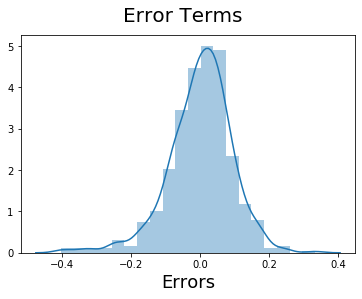

In [96]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

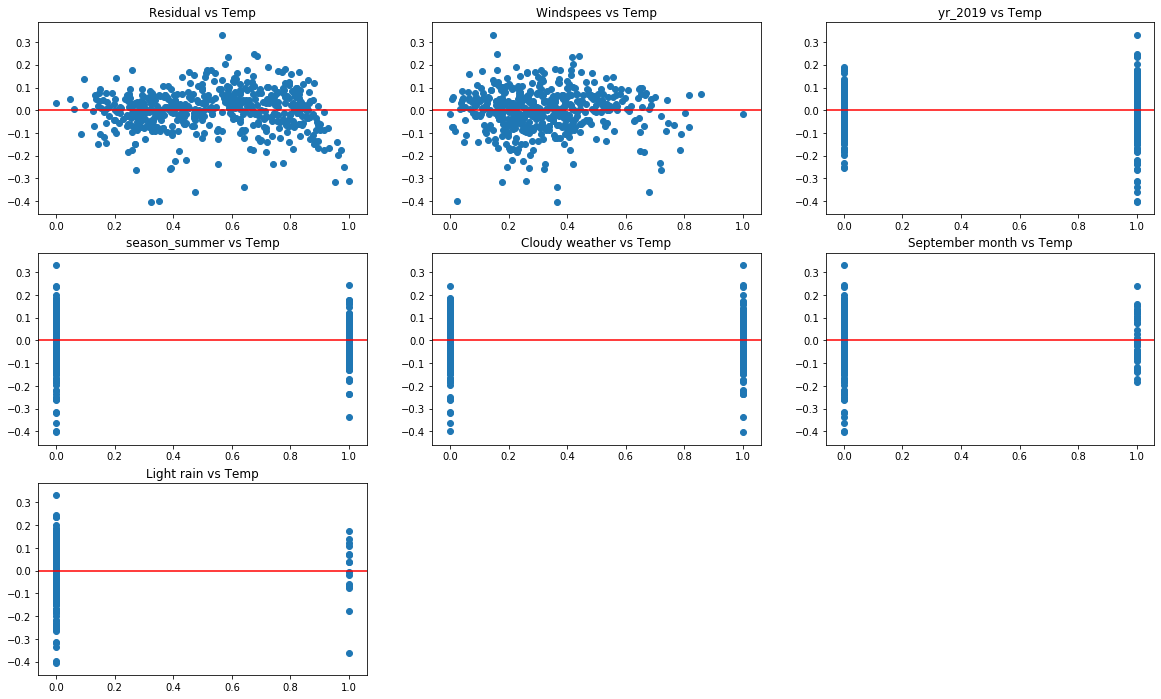

In [97]:
# Scatter Plot for all the residuals. Mostly all the means are being centered at 0

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
plt.scatter(X_train['temp'],res)
plt.title("Residual vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,2)
plt.scatter(X_train['windspeed'],res)
plt.title("Windspees vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,3)
plt.scatter(X_train['yr_2019'],res)
plt.title("yr_2019 vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,4)
plt.scatter(X_train['season_summer'],res)
plt.title("season_summer vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,5)
plt.scatter(X_train['weathersit_Cloudy'],res)
plt.title("Cloudy weather vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,6)
plt.scatter(X_train['mnth_Sept'],res)
plt.title("September month vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.subplot(3,3,7)
plt.scatter(X_train['weathersit_Light Rain'],res)
plt.title("Light rain vs Temp")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Step 8: Making Predictions Using the Final Model 

* We need to so same scaling on the test set that we did on the prediction set.
* We never use .fit on the test set because in ML we never use test set to make predictions or anything. Our test set is the 
  unseen data and we still don't have it. We pretend we don't have that data.
* We only transform on the test set and not fit.

In [98]:
#  Transform the numerical variables 
num_vars = ['temp','atemp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Dividing the test set into x_test and y_test

In [99]:
# Splitting df_test into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [100]:
# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)

In [101]:
X_test_lm.columns

Index(['const', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'yr_2019', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'holiday_No_Holiday',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs',
       'weekday_Tue', 'weekday_Wed', 'workingday_WorkingDay',
       'weathersit_Cloudy', 'weathersit_Light Rain'],
      dtype='object')

In [102]:
X_test_lm = X_test_lm.drop(['atemp','hum', 'holiday_No_Holiday', 'workingday_WorkingDay', 'season_spring','mnth_Aug', 'mnth_Dec', 'mnth_Feb','mnth_Jan', 'mnth_July', 'mnth_June', 'mnth_Mar', 'mnth_May','mnth_Nov', 'mnth_Oct','weekday_Mon', 'weekday_Sat','weekday_Sun', 'weekday_Thurs', 'weekday_Tue', 'weekday_Wed'], axis = 1)

In [103]:
# Making predictions using the fourth model
y_pred_M22 = lr_22.predict(X_test_lm)

In [104]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [105]:
r_squared = r2_score(y_test, y_pred_M22)
r_squared

0.7906228342366497

# Step 9 Model Evaluation

Text(0, 0.5, 'y_pred')

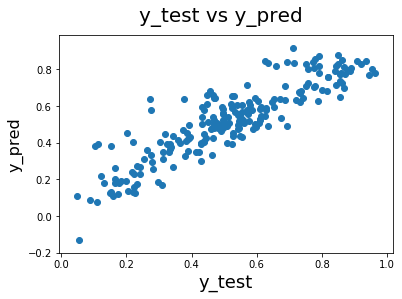

In [106]:
# Plot the y_test and y_pred on a graphic
fig = plt.figure()
plt.scatter(y_test, y_pred_M22)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

# Final Equation


We can see that the equation of our best fitted line is:

<b style='color:red;'>$ 0.1214 + 0.5527  \times  temp - 0.1553 \times windspeed + 0.2331 \times Year2019 + 0.0882 \times summer  - 0.0780  \times cloudy + 0.1294 \times winter + 0.0977 \times sept - 0.2795 \times light-rain $ r</b>


# Model Selection using RFE

### Building our model
This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [109]:
# Importing Libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15

In [117]:
# Defining Model
lm_1 = LinearRegression()

#Fitting Moded
lm_1.fit(X_train, y_train)

rfe = RFE(lm_1, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [118]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 7),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('holiday_No_Holiday', True, 1),
 ('weekday_Mon', False, 5),
 ('weekday_Sat', False, 13),
 ('weekday_Sun', False, 4),
 ('weekday_Thurs', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 8),
 ('workingday_WorkingDay', False, 3),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light Rain', True, 1)]

In [125]:
# Selecting 15 best features which is selected by Model and rank
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'yr_2019', 'mnth_Dec', 'mnth_Jan', 'mnth_July',
       'mnth_Nov', 'mnth_Sept', 'holiday_No_Holiday', 'weathersit_Cloudy',
       'weathersit_Light Rain'],
      dtype='object')

In [126]:
# Checking the features not slected by the Model- Features eliminated by the 
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_Aug', 'mnth_Feb', 'mnth_June', 'mnth_Mar', 'mnth_May',
       'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thurs', 'weekday_Tue', 'weekday_Wed', 'workingday_WorkingDay'],
      dtype='object')

## Manual elimination

### Function to build a model using statsmodel api

In [138]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(colms):
    X_train_sm = sm.add_constant(X_train[colms])
    lm = sm.OLS(y_train,X_train_sm).fit()
    print(lm.summary())
    return lm

### Function to calculate VIFs and print them

In [139]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(colms):
    df1 = X_train[colms]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [140]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[col]
X_train_rfe.shape

(510, 15)

# Model 1 - Start with all variables selected by RFE

In [141]:
build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          3.34e-189
Time:                        22:25:02   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

<b style='color:red;'>Infrence:</b> The R2 is 0.845.  
______
<b style='color:red;'>Reasoning:</b> Variable 'Month Dec' has a VIF of 1.57 which is in acceptable range but has a p-value of 0.034 which is high.  This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 2

In [143]:
# Dropping the variable mnth_Dec as it has high P-Value 
cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer','season_winter', 'yr_2019','mnth_Jan', 'mnth_July',
        'mnth_Nov', 'mnth_Sept', 'holiday_No_Holiday', 'weathersit_Cloudy','weathersit_Light Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.25e-189
Time:                        22:34:39   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

<b style='color:red;'>Infrence:</b> The R2 is slightly decreased.  
______
<b style='color:red;'>Reasoning:</b> Variable 'Month Nov' has a VIF of 1.57 which is in acceptable range but has a p-value of 0.144 which is high.  This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 3

In [145]:
# Dropping the variable mnth_Nov has high p-value
cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer','season_winter', 'yr_2019','mnth_Jan', 'mnth_July',
         'mnth_Sept', 'holiday_No_Holiday', 'weathersit_Cloudy','weathersit_Light Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          4.45e-190
Time:                        22:38:01   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

<b style='color:red;'>Infrence:</b> The R2 is slightly decreased.  
______
<b style='color:red;'>Reasoning:</b> Variable 'Month Jan' has a VIF of 1.68 which is in acceptable range but has a p-value of 0.061 which is high.  This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 4

In [148]:
# Dropping the variable mnth_Jan has high p-value
cols = ['temp', 'hum', 'windspeed', 'season_spring', 'season_summer','season_winter', 'yr_2019', 'mnth_July',
         'mnth_Sept', 'holiday_No_Holiday', 'weathersit_Cloudy','weathersit_Light Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.69e-190
Time:                        22:40:32   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.18

<b style='color:red;'>Infrence:</b> The R2 is slightly decreased.  
______
<b style='color:red;'>Reasoning:</b> Variable 'season_spring' has a VIF of 4.80 which is in acceptable range but has a p-value of 0.007 which is high.  This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 5

In [150]:
# Dropping the variable mnth_Jan has high p-value
cols = ['temp', 'hum', 'windspeed', 'season_summer','season_winter', 'yr_2019', 'mnth_July','mnth_Sept', 
        'holiday_No_Holiday', 'weathersit_Cloudy','weathersit_Light Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          3.89e-190
Time:                        22:43:12   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

<b style='color:red;'>Infrence:</b> The R2 is slightly decreased.  
______
<b style='color:red;'>Reasoning:</b> All P-values are acceptable range. Variable 'hum' has a high VIF of 25.46 which is not in acceptable range.  This means this variable is highly corelated with other variables. Thus it can be dropped too. 

# Model 6

In [153]:
# Dropping the variable humid has high VIF
cols = ['temp', 'windspeed', 'season_summer','season_winter', 'yr_2019', 'mnth_July','mnth_Sept','holiday_No_Holiday', 
        'weathersit_Cloudy','weathersit_Light Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          2.09e-186
Time:                        22:47:27   Log-Likelihood:                 494.09
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     499   BIC:                            -919.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

<b style='color:red;'>Infrence:</b> The R2 is slightly decreased and Vif values also slightly reduced.  
______
<b style='color:red;'>Reasoning:</b> Variable 'mnth_July' has a VIF of 1.53 which is in acceptable range but has a p-value of 0.028 which is high.  This means that statistically this variable is not significant enough in our mutli-variable regression. Thus it can be dropped too. 

# Model 7

In [155]:
# Dropping the variable mnth_July has high VIF
cols = ['temp', 'windspeed', 'season_summer','season_winter', 'yr_2019', 'mnth_Sept','holiday_No_Holiday','weathersit_Cloudy',
        'weathersit_Light Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          1.37e-186
Time:                        22:50:09   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.02

<b style='color:red;'>Infrence:</b> The R2 is slightly decreased and VIF also slightly reduced. 
______
<b style='color:red;'>Reasoning:</b> All P-Values are in acceptable range. Variable 'holiday_No_Holiday' has a high VIF of 12.27. Thus it can be dropped too. 

# Model 8

In [157]:
# Dropping the variable holiday_No_Holiday has high VIF
cols = ['temp', 'windspeed', 'season_summer','season_winter', 'yr_2019', 'mnth_Sept','weathersit_Cloudy','weathersit_Light Rain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     297.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):          8.04e-185
Time:                        22:54:01   Log-Likelihood:                 484.51
No. Observations:                 510   AIC:                            -951.0
Df Residuals:                     501   BIC:                            -912.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

## Inference
Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.826 Let us select Model 8 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [158]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [160]:
#Let us build the finalmodel using sklearn
cols = ['temp', 'windspeed', 'season_summer','season_winter', 'yr_2019', 'mnth_Sept','weathersit_Cloudy','weathersit_Light Rain']
    

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.12139198173517973 [ 0.55272535 -0.15525969  0.08817579  0.1294023   0.23310784  0.09769785
 -0.07804436 -0.27949241]


# Residual Analysis

In [161]:
y_train_pt = lr.predict(X_train[cols])

In [163]:
res = y_train - y_train_pt

Text(0.5, 0, 'Errors')

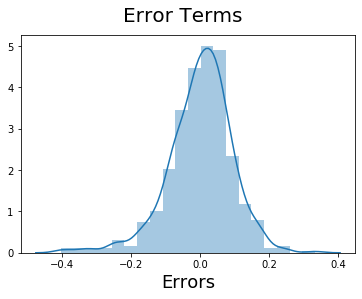

In [164]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

### Errors are normally distribured here with mean 0. So everything seems to be fine

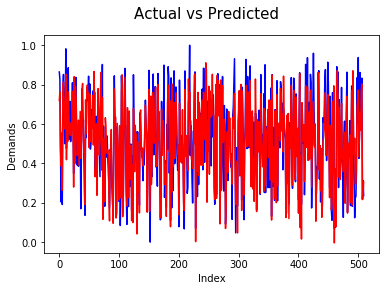

In [167]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pt, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

In [168]:
#Print R-squared Value
r2_score(y_train,y_train_pt)

0.8260531156947925

Inference
R2 Same as we obtained for our final model

### Linearity Check

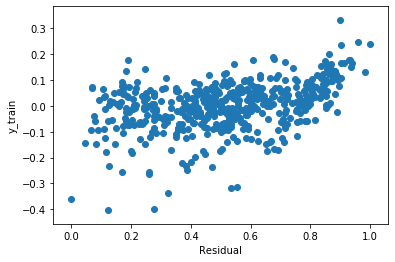

In [171]:
# scatter plot for the check
plt.scatter(y_train,res)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

## Predict values for test data set

In [172]:
#Predict the values for test data
y_test_pt = lr.predict(X_test[cols])

## R-Squared value for test predictions

In [174]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pt)

0.7906228342366497

Inference
R2 value for predictions on test data (0.790) is close to R2 value of train data(0.82). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

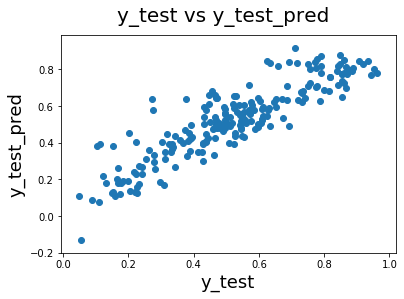

In [177]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pt)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 18)

####  _`Inference`_
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

## Plot Test vs Predicted test values

In [178]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)

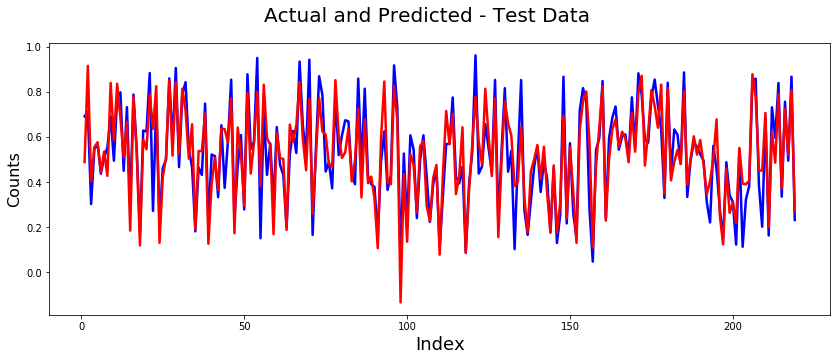

In [179]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pt,len(y_test)+1,'Test Data')

Inference

As we can see predictions for test data is very close to actuals

# Interepretation of results
Analysing the above model, the comapany should focus on the following features:
    
1. Company should focus on expanding business during Spring.
2. Company should focus on expanding business during September.
3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
4. There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- Sunday
- weathersit( Light Snow, Mist + Cloudy)